In [3]:
#!/usr/bin/env python
"""
Demo for STEMPO dynamic tomography test problem
--------------------------------------------------------------------------
Created in 2023 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Silvia Gazzola"
__affiliations__ = 'MIT and Tufts University, and University of Bath'
__copyright__ = "Copyright 2023, TRIPs-Py library"
__license__ = "Apache"
__version__ = "1.0"
__email__ = "mpasha@mit.edu; mirjeta.pasha1@gmail.com; sg968@bath.ac.uk;"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
import time
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import astra
from venv import create
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.solvers.MMGKS import *
import requests
import numpy as np
import h5py
import pylops
from trips.utilities.helpers import *
from trips.utilities.io import *
from trips.utilities.operators import *
from trips.solvers.Hybrid_LSQR import *

In [5]:
(F_, d, Aseq, B, nx, ny, nt, savedelta, truth_) = generate_stempo1(data_set = 'simulation', data_thinning = 2, noise_level = 0.01, nt=30,new_shape=(128,128),views=5)

<Figure size 640x480 with 0 Axes>

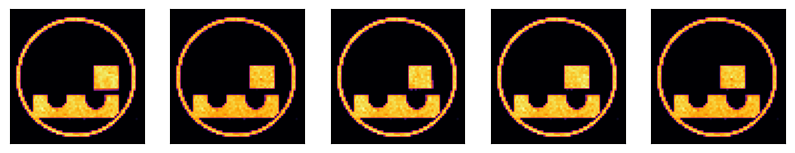

In [42]:
plt.set_cmap('inferno');
fig,ax=plt.subplots(1,nt,figsize=(10,5))
for i in range(0,nt):
    ax[i].imshow(truth[i].reshape(shape))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

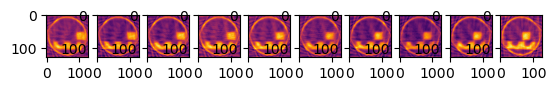

In [ ]:
xs = []
for i in range(10):
    A = Aseq[i] #@np.identity(Aseq[i].shape[1])
    b = B[i]
    x = scipy.sparse.linalg.lsqr(A,b)[0] #np.linalg.lstsq(A,b)
    xs.append(x)
fig,ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(xs[i].reshape(nx,ny))

## Views: 5; GS:1

In [7]:
from imports import *
from trips.solvers.MMGKS import *
shape = (64,64)
(F_, d, Aseq, B, nx, ny, nt, savedelta, truth_) = generate_stempo1(data_set = 'simulation', data_thinning = 2, noise_level = 0.01, nt=30,new_shape=shape,views=5)
t_end=5
t_0 = 5
truth = truth_[t_0:t_0+t_end]

A1=Aseq[1]
L = spatial_derivative_operator(nx, ny, 1)
I = sparse.identity(A1.shape[1])
I_bar = scipy.sparse.block_diag([I for i in range(t_0,t_0+t_end)]) 
A_bar = pylops.BlockDiag([Aseq[i] for i in range(t_0,t_0+t_end)])
L = gen_first_derivative_operator_2D(nx, ny)
L_bar = scipy.sparse.block_diag([L for i in range(t_end)]) #pylops.BlockDiag([L for i in range(0,t_end)])
data_vec_bar = vec(np.array([B[t] for t in  range(t_0,t_0+t_end)])).reshape(-1,1)
delta = np.mean(savedelta)# la.norm(data_vec_true_bar-data_vec_bar) #/#la.norm(data_vec_true_bar)
print(delta)

0.23005443255106608


In [18]:

n_iter = 200
n_iter_b = 20
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg =   True
size=nx*ny
shape = (nx,ny)
v_max = 1
interval = n_iter//4

X_true = truth.flatten()


# MMGKS

nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)


def run_all_methods(i):
    if (i == 1):
        return MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)
    elif (i==2):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    elif(i==3):
        return MMGKS_dyn_joint_(A_bar, data_vec_bar, L, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = interval)
    
    elif (i==4):
        return  MMGKS2(A_bar, data_vec_bar, L, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta,non_neg=non_neg)


In [19]:
from multiprocessing.pool import ThreadPool

with ThreadPool(5) as p:
    result = p.map(run_all_methods, [1, 2,3,4])
# print(result)

generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]


generating basis...: 100%|██████████| 10/10 [00:00<00:00, 116.58it/s]







































































running MMGKS...:   0%|          | 1/200 [00:03<13:12,  3.98s/it]


running MMGKS...:   1%|          | 2/200 [00:04<05:37,  1.71s/it]

running MMGKS...:   2%|▏         | 3/200 [00:04<03:12,  1.02it/s]


running MMGKS...:   2%|▏         | 4/200 [00:04<02:06,  1.55it/s]

running MMGKS...:   2%|▎         | 5/200 [00:04<01:30,  2.16it/s]



running MMGKS...:   3%|▎         | 6/200 [00:04<01:09,  2.81it/s]



running MMGKS...:   4%|▎         | 7/200 [00:04<00:57,  3.38it/s]


running MMGKS...:   4%|▍         | 8/200 [00:04<00:50,  3.78it/s]


running MMGKS...:   4%|▍         | 9/200 [00:05<00:44,  4.26it/s]


running MMGKS...:   5%|▌         | 10/200 [00:05<00:43,  4.38it/s]





running MMGKS...:   6%|▌         | 11/200 [00:05<00:40,  4.63it/s]


running MMGKS...:   6%|▌         | 12/200 [0

In [20]:
(X_mmgks, info_mmgks) = result[0]
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]
print('MMGKS Solution relative error:', error_mmgks)

(X_mmgks_OF, info_mmgks_OF, vs_est, v_primes_est) = result[1]

error_mmgks_OF = info_mmgks_OF['relError'][-1]
Ms_OF = info_mmgks_OF['Ms']

X_mmgks_OF[X_mmgks_OF<0]=0
X_mmgks_OF_list = [X_mmgks_OF[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS-OF Solution relative error:', error_mmgks_OF)

(X_aniso, info_aniso) = result[3]
error_aniso = info_aniso['relError'][-1]

X_aniso[X_aniso<0]=0
X_aniso_list = [X_aniso[size*i:size*(i+1)] for i in range(t_end)]

print('ANISO-TV Solution relative error:', error_aniso)

(X_mmgks_OF_dyn, info_mmgks_OF_dyn, vs_est_dyn, v_primes_est_dyn) = result[2]

error_mmgks_OF_dyn = info_mmgks_OF_dyn['relError'][-1]
Ms = info_mmgks_OF_dyn['Ms']

X_mmgks_OF_dyn[X_mmgks_OF_dyn<0]=0
X_mmgks_OF_dyn_list = [X_mmgks_OF_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS-OF Solution relative error:', error_mmgks_OF_dyn)



MMGKS Solution relative error: 0.5800891649063973
MMGKS-OF Solution relative error: 0.4542799464262664
ANISO-TV Solution relative error: 0.474025076066636
Dynamic MMGKS-OF Solution relative error: 0.4471680738027289


In [22]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_OF',rre_all(X_mmgks_OF,X_true,nt,nx,ny))
print('RRE_ANISO-TV',rre_all(X_aniso,X_true,nt,nx,ny))
print('RRE_MMGKS_OF_DYN',rre_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF',ssim_all(X_mmgks_OF,X_true,nt,nx,ny))
print('SSIM_ANISO-TV',ssim_all(X_aniso,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF_dyn',ssim_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))

RRE_MMGKS 0.5783072476457607
RRE_MMGKS_OF 0.454242534134364
RRE_ANISO-TV 0.4739459613121621
RRE_MMGKS_OF_DYN 0.447111519115305
SSIM_MMGKS 0.7576107726503742
SSIM_MMGKS_OF 0.8539443715339775
SSIM_ANISO-TV 0.8415026535374649
SSIM_MMGKS_OF_dyn 0.8579395633636085


In [24]:
rec_list = [X_mmgks_OF_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_OF_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.05793016000769788
SSIM_optical_flow_rec 0.9976467133846041


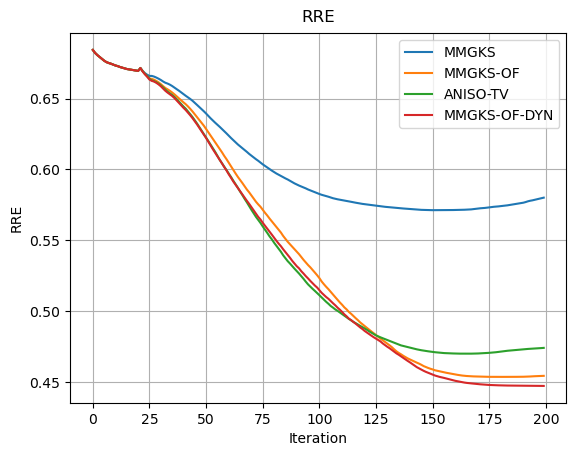

In [23]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_mmgks_OF['relError'],label='MMGKS-OF')
plt.plot(info_aniso['relError'],label='ANISO-TV')
plt.plot(info_mmgks_OF_dyn['relError'],label='MMGKS-OF-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

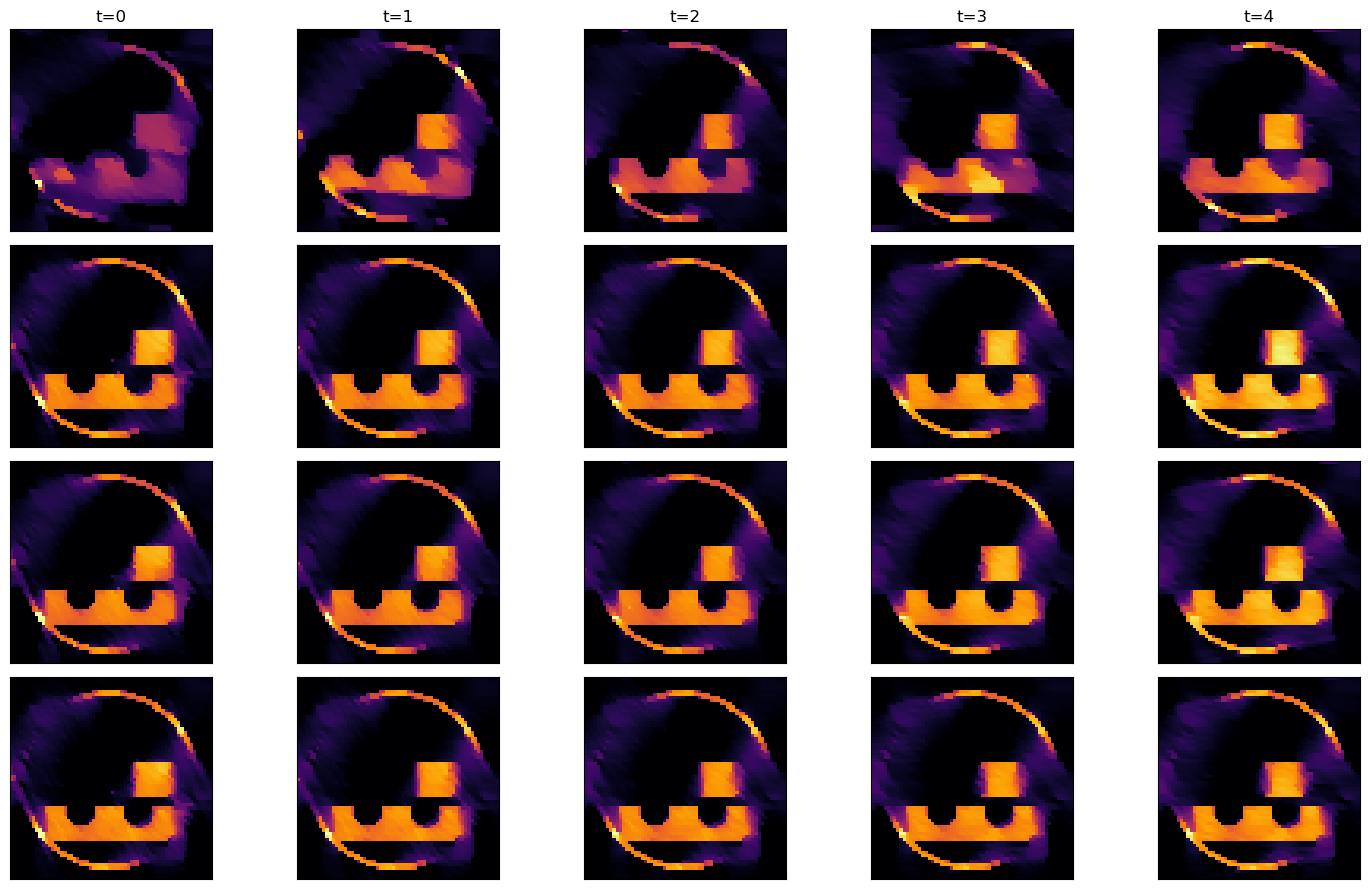

In [25]:
fig,ax=plt.subplots(4,t_end,figsize=(15,9),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[1,i].imshow(X_mmgks_OF_list[i].reshape(shape))
    ax[3,i].imshow(X_mmgks_OF_dyn_list[i].reshape(shape))
    ax[2,i].imshow(X_aniso_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [61]:
folder = 'example_2/views_5'
np.save(f'{folder}/X_mmgks.npy',X_mmgks)
np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/X_GS.npy',X_GS)
np.save(f'{folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/relError_GS.npy',info_GS['relError'])
np.save(f'{folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/regParam_GS.npy',info_GS['regParam_history'])

## Views: 8; GS:1

In [27]:
from imports import *
from trips.solvers.MMGKS import *
shape = (64,64)
(F_, d, Aseq, B, nx, ny, nt, savedelta, truth_) = generate_stempo1(data_set = 'simulation', data_thinning = 2, noise_level = 0.01, nt=30,new_shape=shape,views=8)
t_end=5
t_0 = 5
truth = truth_[t_0:t_0+t_end]

A1=Aseq[1]
L = spatial_derivative_operator(nx, ny, 1)
I = sparse.identity(A1.shape[1])
I_bar = scipy.sparse.block_diag([I for i in range(t_0,t_0+t_end)]) 
A_bar = pylops.BlockDiag([Aseq[i] for i in range(t_0,t_0+t_end)])
L = gen_first_derivative_operator_2D(nx, ny)
L_bar = scipy.sparse.block_diag([L for i in range(t_end)]) #pylops.BlockDiag([L for i in range(0,t_end)])
data_vec_bar = vec(np.array([B[t] for t in  range(t_0,t_0+t_end)])).reshape(-1,1)
delta = np.mean(savedelta)# la.norm(data_vec_true_bar-data_vec_bar) #/#la.norm(data_vec_true_bar)
print(delta)

0.29427711041768395


In [29]:

n_iter = 200
n_iter_b = 20
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg =   True
size=nx*ny
shape = (nx,ny)
v_max = 1
interval = n_iter//4

nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)

X_true = truth.flatten()

from multiprocessing.pool import ThreadPool

with ThreadPool(5) as p:
    result = p.map(run_all_methods, [1, 2,3,4])

generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]


generating basis...: 100%|██████████| 10/10 [00:00<00:00, 116.12it/s]

















































































running MMGKS...:   0%|          | 1/200 [00:04<14:39,  4.42s/it]

running MMGKS...:   1%|          | 2/200 [00:04<06:13,  1.88s/it]


running MMGKS...:   2%|▏         | 3/200 [00:04<03:30,  1.07s/it]


running MMGKS...:   2%|▏         | 4/200 [00:04<02:17,  1.42it/s]


running MMGKS...:   2%|▎         | 5/200 [00:04<01:38,  1.99it/s]

running MMGKS...:   3%|▎         | 6/200 [00:05<01:12,  2.67it/s]



running MMGKS...:   4%|▎         | 7/200 [00:05<00:57,  3.33it/s]


running MMGKS...:   4%|▍         | 8/200 [00:05<00:49,  3.87it/s]


running MMGKS...:   4%|▍         | 9/200 [00:05<00:45,  4.21it/s]





running MMGKS...:   5%|▌         | 10/200 [00:05<00:42,  4.50it/s]


running MMGKS...:   6%|▌         | 11/200 [00:05<00:37,  4.99it/s]





running MMGKS...:   6%|▌        

In [30]:
(X_mmgks, info_mmgks) = result[0]
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]
print('MMGKS Solution relative error:', error_mmgks)

(X_mmgks_OF, info_mmgks_OF, vs_est, v_primes_est) = result[1]

error_mmgks_OF = info_mmgks_OF['relError'][-1]
Ms_OF = info_mmgks_OF['Ms']

X_mmgks_OF[X_mmgks_OF<0]=0
X_mmgks_OF_list = [X_mmgks_OF[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS-OF Solution relative error:', error_mmgks_OF)

(X_aniso, info_aniso) = result[3]
error_aniso = info_aniso['relError'][-1]

X_aniso[X_aniso<0]=0
X_aniso_list = [X_aniso[size*i:size*(i+1)] for i in range(t_end)]

print('ANISO-TV Solution relative error:', error_aniso)

(X_mmgks_OF_dyn, info_mmgks_OF_dyn, vs_est_dyn, v_primes_est_dyn) = result[2]

error_mmgks_OF_dyn = info_mmgks_OF_dyn['relError'][-1]
Ms = info_mmgks_OF_dyn['Ms']

X_mmgks_OF_dyn[X_mmgks_OF_dyn<0]=0
X_mmgks_OF_dyn_list = [X_mmgks_OF_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS-OF Solution relative error:', error_mmgks_OF_dyn)



MMGKS Solution relative error: 0.4533408847552058
MMGKS-OF Solution relative error: 0.32922333263600145
ANISO-TV Solution relative error: 0.35644967306431935
Dynamic MMGKS-OF Solution relative error: 0.32312145058588876


In [31]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_OF',rre_all(X_mmgks_OF,X_true,nt,nx,ny))
print('RRE_ANISO-TV',rre_all(X_aniso,X_true,nt,nx,ny))
print('RRE_MMGKS_OF_DYN',rre_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF',ssim_all(X_mmgks_OF,X_true,nt,nx,ny))
print('SSIM_ANISO-TV',ssim_all(X_aniso,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF_dyn',ssim_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))

RRE_MMGKS 0.4532386012850472
RRE_MMGKS_OF 0.32920616815273557
RRE_ANISO-TV 0.35644247857528716
RRE_MMGKS_OF_DYN 0.3231098128426958
SSIM_MMGKS 0.8628809702436456
SSIM_MMGKS_OF 0.9267252666426247
SSIM_ANISO-TV 0.9137848309478904
SSIM_MMGKS_OF_dyn 0.9293452834367653


In [32]:
rec_list = [X_mmgks_OF_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_OF_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.1148893378808119
SSIM_optical_flow_rec 0.9910366729660264


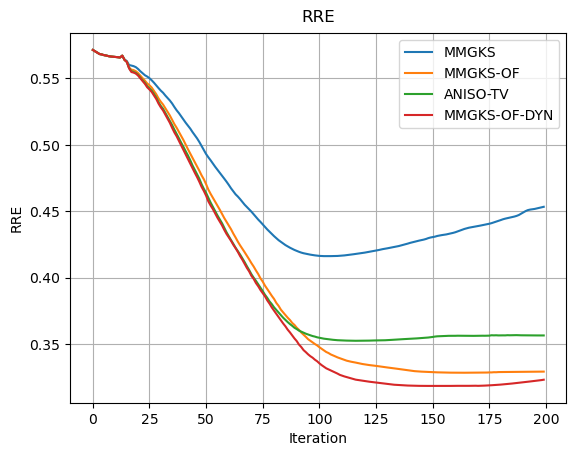

In [33]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_mmgks_OF['relError'],label='MMGKS-OF')
plt.plot(info_aniso['relError'],label='ANISO-TV')
plt.plot(info_mmgks_OF_dyn['relError'],label='MMGKS-OF-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

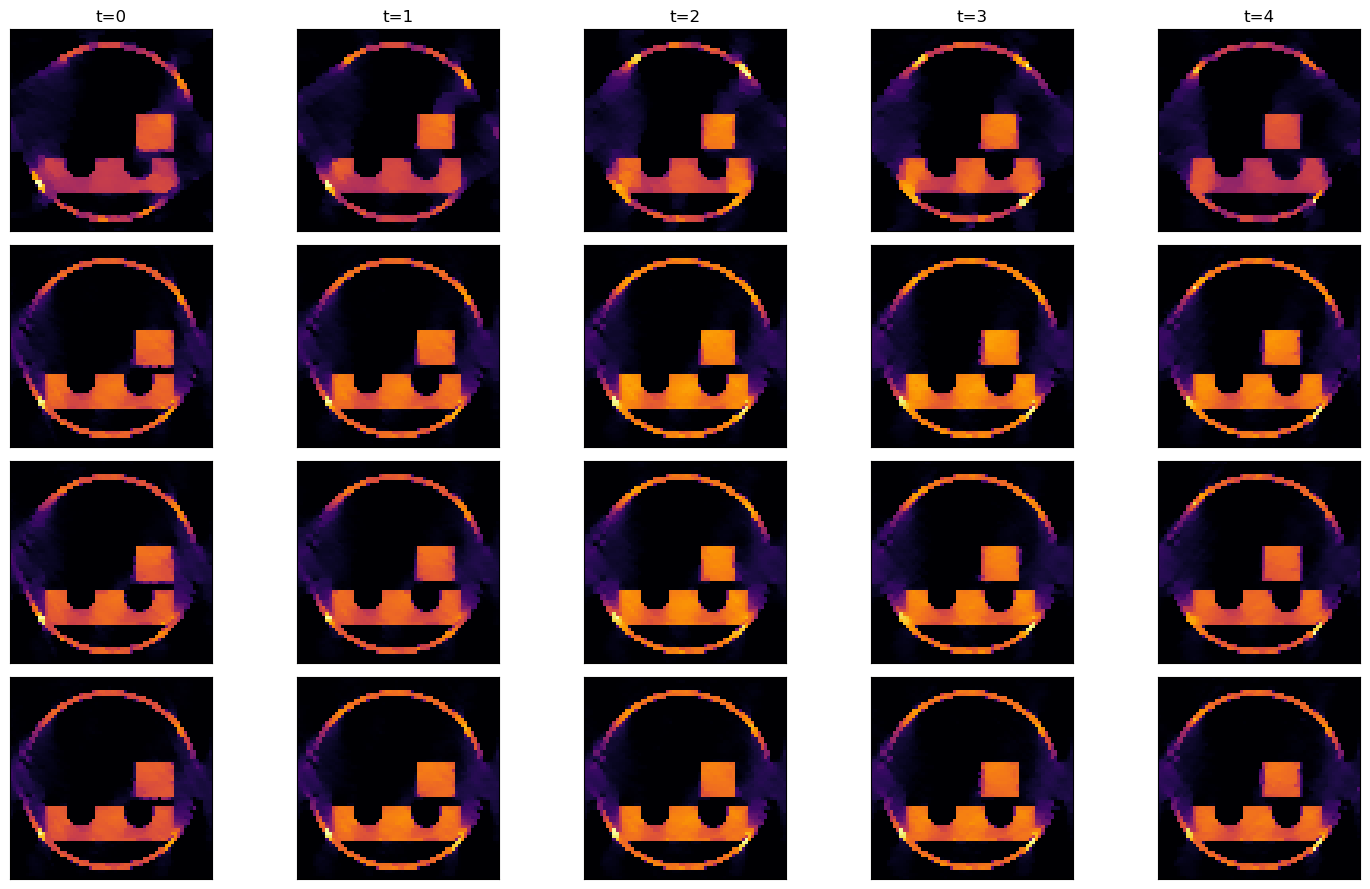

In [34]:
fig,ax=plt.subplots(4,t_end,figsize=(15,9),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[1,i].imshow(X_mmgks_OF_list[i].reshape(shape))
    ax[3,i].imshow(X_mmgks_OF_dyn_list[i].reshape(shape))
    ax[2,i].imshow(X_aniso_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [70]:
folder = 'example_2/views_8'
np.save(f'{folder}/X_mmgks.npy',X_mmgks)
np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/X_GS.npy',X_GS)
np.save(f'{folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/relError_GS.npy',info_GS['relError'])
np.save(f'{folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/regParam_GS.npy',info_GS['regParam_history'])

## Views: 11; GS:1

In [35]:
from imports import *
from trips.solvers.MMGKS import *
shape = (64,64)
(F_, d, Aseq, B, nx, ny, nt, savedelta, truth_) = generate_stempo1(data_set = 'simulation', data_thinning = 2, noise_level = 0.01, nt=30,new_shape=shape,views=11)
t_end=5
t_0 = 5
truth = truth_[t_0:t_0+t_end]

A1=Aseq[1]
L = spatial_derivative_operator(nx, ny, 1)
I = sparse.identity(A1.shape[1])
I_bar = scipy.sparse.block_diag([I for i in range(t_0,t_0+t_end)]) 
A_bar = pylops.BlockDiag([Aseq[i] for i in range(t_0,t_0+t_end)])
L = gen_first_derivative_operator_2D(nx, ny)
L_bar = scipy.sparse.block_diag([L for i in range(t_end)]) #pylops.BlockDiag([L for i in range(0,t_end)])
data_vec_bar = vec(np.array([B[t] for t in  range(t_0,t_0+t_end)])).reshape(-1,1)
delta = np.mean(savedelta)# la.norm(data_vec_true_bar-data_vec_bar) #/#la.norm(data_vec_true_bar)
print(delta)

0.34708636093139655


In [36]:

n_iter = 200
n_iter_b = 20
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg =   True
size=nx*ny
shape = (nx,ny)
v_max = 1
interval = n_iter//4

nt=t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)

X_true = truth.flatten()

from multiprocessing.pool import ThreadPool

with ThreadPool(5) as p:
    result = p.map(run_all_methods, [1, 2,3,4])



generating basis...: 100%|██████████| 10/10 [00:00<00:00, 81.04it/s]








































































running MMGKS...:   1%|          | 2/200 [00:04<05:55,  1.79s/it]


running MMGKS...:   2%|▏         | 3/200 [00:04<03:22,  1.03s/it]




running MMGKS...:   2%|▎         | 5/200 [00:04<01:33,  2.08it/s]


running MMGKS...:   3%|▎         | 6/200 [00:04<01:09,  2.78it/s]



running MMGKS...:   4%|▎         | 7/200 [00:04<00:57,  3.38it/s]


running MMGKS...:   4%|▍         | 8/200 [00:05<00:51,  3.76it/s]





running MMGKS...:   4%|▍         | 9/200 [00:05<00:45,  4.21it/s]


running MMGKS...:   5%|▌         | 10/200 [00:05<00:43,  4.38it/s]





running MMGKS...:   6%|▌         | 11/200 [00:05<00:42,  4.49it/s]



running MMGKS...:   6%|▌         | 12/200 [00:06<00:42,  4.47it/s]




running MMGKS...:   6%|▋         | 13/200 [00:06<00:43,  4.34it/s]


running MMGKS...:   7%|▋         | 14/200 [00:06<00:45,  4.11it/s]






running MMGKS...:   

In [37]:
(X_mmgks, info_mmgks) = result[0]
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]
print('MMGKS Solution relative error:', error_mmgks)

(X_mmgks_OF, info_mmgks_OF, vs_est, v_primes_est) = result[1]

error_mmgks_OF = info_mmgks_OF['relError'][-1]
Ms_OF = info_mmgks_OF['Ms']

X_mmgks_OF[X_mmgks_OF<0]=0
X_mmgks_OF_list = [X_mmgks_OF[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS-OF Solution relative error:', error_mmgks_OF)

(X_aniso, info_aniso) = result[3]
error_aniso = info_aniso['relError'][-1]

X_aniso[X_aniso<0]=0
X_aniso_list = [X_aniso[size*i:size*(i+1)] for i in range(t_end)]

print('ANISO-TV Solution relative error:', error_aniso)

(X_mmgks_OF_dyn, info_mmgks_OF_dyn, vs_est_dyn, v_primes_est_dyn) = result[2]

error_mmgks_OF_dyn = info_mmgks_OF_dyn['relError'][-1]
Ms = info_mmgks_OF_dyn['Ms']

X_mmgks_OF_dyn[X_mmgks_OF_dyn<0]=0
X_mmgks_OF_dyn_list = [X_mmgks_OF_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS-OF Solution relative error:', error_mmgks_OF_dyn)



MMGKS Solution relative error: 0.22882322977919656
MMGKS-OF Solution relative error: 0.049560925932200454
ANISO-TV Solution relative error: 0.05650121436762011
Dynamic MMGKS-OF Solution relative error: 0.06563942703774384


In [38]:
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_OF',rre_all(X_mmgks_OF,X_true,nt,nx,ny))
print('RRE_ANISO-TV',rre_all(X_aniso,X_true,nt,nx,ny))
print('RRE_MMGKS_OF_DYN',rre_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF',ssim_all(X_mmgks_OF,X_true,nt,nx,ny))
print('SSIM_ANISO-TV',ssim_all(X_aniso,X_true,nt,nx,ny))
print('SSIM_MMGKS_OF_dyn',ssim_all(X_mmgks_OF_dyn,X_true,nt,nx,ny))

RRE_MMGKS 0.22814410951922387
RRE_MMGKS_OF 0.04952147179820969
RRE_ANISO-TV 0.05647797064757985
RRE_MMGKS_OF_DYN 0.06494092567430867
SSIM_MMGKS 0.9648227732890383
SSIM_MMGKS_OF 0.9983477129123122
SSIM_ANISO-TV 0.9978397772930924
SSIM_MMGKS_OF_dyn 0.9971295629764649


In [39]:
rec_list = [X_mmgks_OF_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_OF_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_OF_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.12906081762547247
SSIM_optical_flow_rec 0.9889642251150557


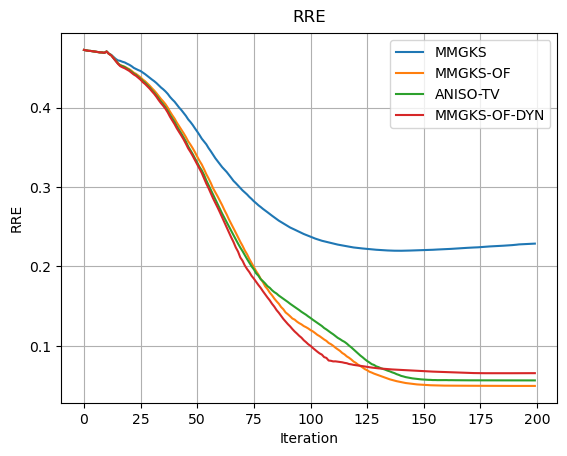

In [40]:
plt.plot(info_mmgks['relError'],label='MMGKS')
plt.plot(info_mmgks_OF['relError'],label='MMGKS-OF')
plt.plot(info_aniso['relError'],label='ANISO-TV')
plt.plot(info_mmgks_OF_dyn['relError'],label='MMGKS-OF-DYN')
plt.xlabel('Iteration') 
plt.grid('minor')
plt.ylabel('RRE')
plt.legend()
plt.title('RRE',va='bottom');

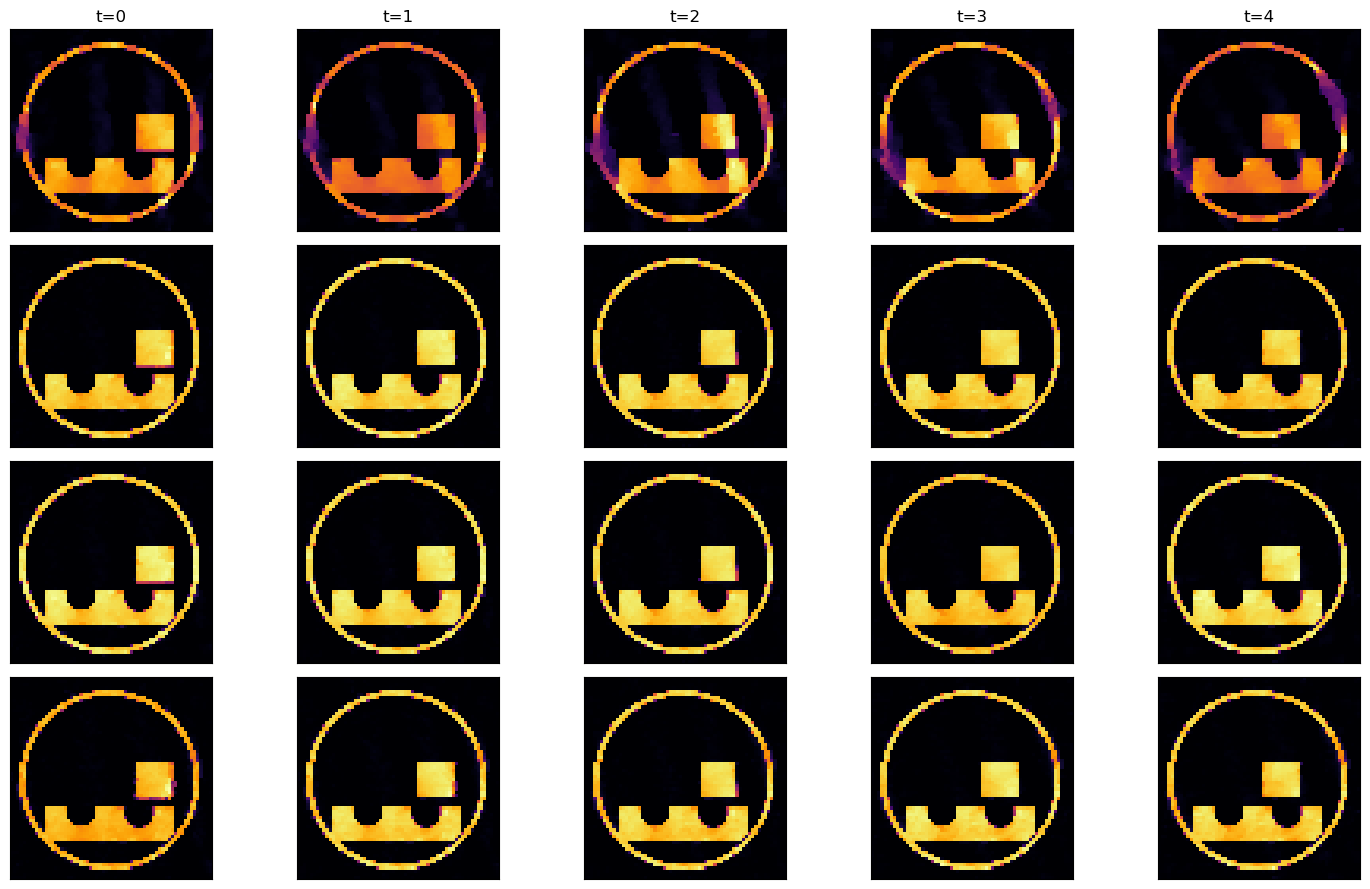

In [41]:
fig,ax=plt.subplots(4,t_end,figsize=(15,9),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_list[i].reshape(shape))
    ax[1,i].imshow(X_mmgks_OF_list[i].reshape(shape))
    ax[3,i].imshow(X_mmgks_OF_dyn_list[i].reshape(shape))
    ax[2,i].imshow(X_aniso_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
plt.subplots_adjust(wspace=None, hspace=None)
fig.tight_layout(h_pad=1)
# fig.suptitle('Recovered Solutions to the Regularized Problem '  + '(Top Row: Recovered with MMGKS;' + 
#                 ' Middle Row: Recovered with TV-ISO;'   + 
#              ' Bottom Row: Recovered with Dynamic MMGKS)' + '\n' );

In [79]:
folder = 'example_2/views_11'
np.save(f'{folder}/X_mmgks.npy',X_mmgks)
np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/X_GS.npy',X_GS)
np.save(f'{folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/relError_GS.npy',info_GS['relError'])
np.save(f'{folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/regParam_GS.npy',info_GS['regParam_history'])

## Views 11: Grid size:2

In [82]:
v_max = 2

# ## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'gcv',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta, pnorm_opt=2,qnorm_opt=2,non_neg=non_neg,interval=50)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)


running MMGKS...: 100%|██████████| 200/200 [04:40<00:00,  1.40s/it]

Dynamic MMGKS Solution relative error: 0.05212748401834244


In [85]:
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))

RRE_MMGKS_DYN 0.051983483980372294
SSIM_MMGKS_DYN 0.9981803364168659


In [86]:
rec_list = [X_mmgks_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.15924954498041516
SSIM_optical_flow_rec 0.9828502750881765


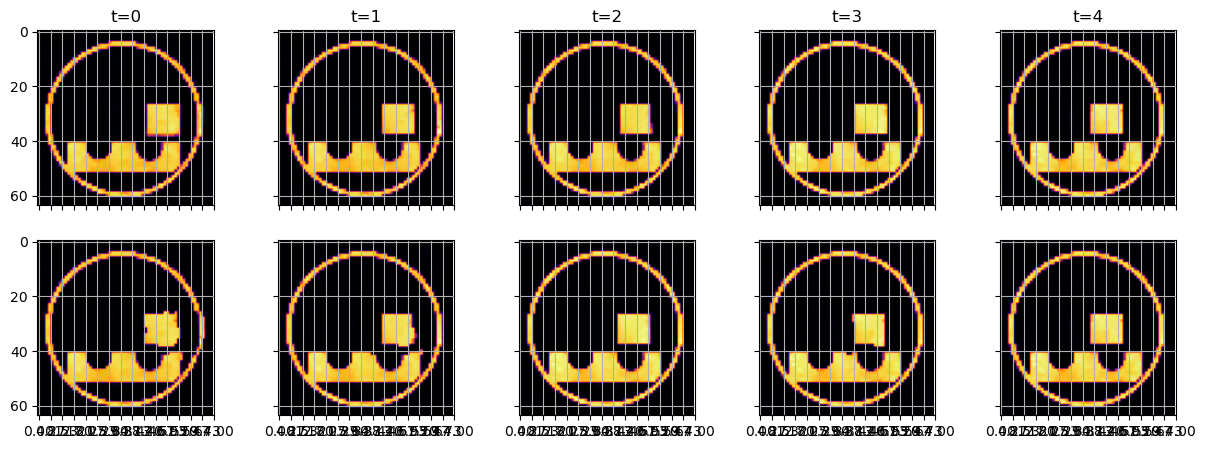

In [89]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
fig,ax=plt.subplots(2,t_end,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_dyn_list[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)

plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [90]:
folder = 'example_2/gs_2'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])

## Views 11: Grid size:4

In [91]:
v_max = 4

# ## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'gcv',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta, pnorm_opt=2,qnorm_opt=2,non_neg=non_neg,interval=50)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)


running MMGKS...: 100%|██████████| 200/200 [06:03<00:00,  1.82s/it]


Dynamic MMGKS Solution relative error: 0.11004740155602964


In [92]:
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))

RRE_MMGKS_DYN 0.1071167294412412
SSIM_MMGKS_DYN 0.992131236390817


In [93]:
rec_list = [X_mmgks_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.2184799413962597
SSIM_optical_flow_rec 0.9694817897049643


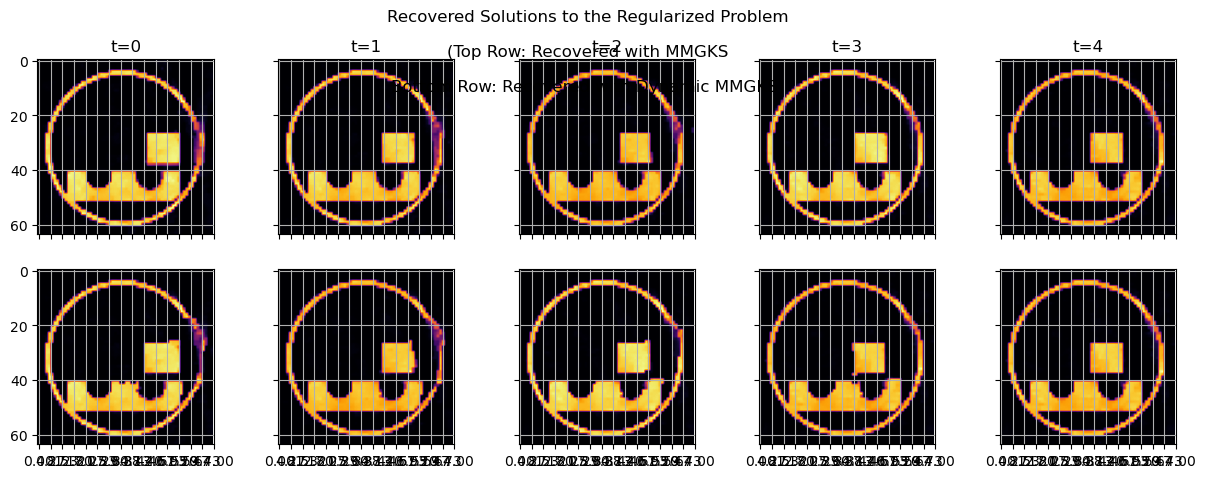

In [96]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[-1]]
for i in range(t_end-1):
    M = Ms[::-1][i]
    next_ = M@X_mmgks_dyn_list[::-1][i] #[-1]
    rec_list.append(next_)
rec_list.reverse()
fig,ax=plt.subplots(2,t_end,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end):
    ax[0,i].imshow(X_mmgks_dyn_list[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)

plt.subplots_adjust(wspace=None, hspace=None)
fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
             'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [97]:
folder = 'example_2/gs_4'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])